In [8]:
#importing sql module
import sqlite3

In [10]:
#creating database
conn = sqlite3.connect('sales_data.db') 
cursor = conn.cursor()

In [12]:
#creating sales table
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        order_id TEXT NOT NULL,
        product_name TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL,
        order_date TEXT NOT NULL
    )
''')

In [14]:
#adding data into sales table database
sample_data = [
    ("ORD001", "Laptop", 2, 75000.00, "2025-01-10"),
    ("ORD002", "Mouse", 5, 500.00, "2025-01-12"),
    ("ORD003", "Keyboard", 3, 1500.00, "2025-02-01"),
    ("ORD004", "Monitor", 1, 12000.00, "2025-02-15"),
    ("ORD005", "Printer", 1, 8000.00, "2025-03-05")
]

cursor.executemany('''
    INSERT INTO sales (order_id, product_name, quantity, price, order_date)
    VALUES (?, ?, ?, ?, ?)
''', sample_data)

In [16]:
#saving and closing the database
conn.commit()
conn.close()

In [18]:
#Running SQL command that display the stored data 
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()
for row in rows:
    print(row)
conn.close()

(1, 'ORD001', 'Laptop', 2, 75000.0, '2025-01-10')
(2, 'ORD002', 'Mouse', 5, 500.0, '2025-01-12')
(3, 'ORD003', 'Keyboard', 3, 1500.0, '2025-02-01')
(4, 'ORD004', 'Monitor', 1, 12000.0, '2025-02-15')
(5, 'ORD005', 'Printer', 1, 8000.0, '2025-03-05')


In [29]:
#Running a basic SQL command to group things and give them a name 
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
query = """
SELECT 
    product_name, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product_name;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"Product: {row[0]}, Total Quantity: {row[1]}, Revenue: ₹{row[2]:,.2f}")
conn.close()

Product: Keyboard, Total Quantity: 3, Revenue: ₹4,500.00
Product: Laptop, Total Quantity: 2, Revenue: ₹150,000.00
Product: Monitor, Total Quantity: 1, Revenue: ₹12,000.00
Product: Mouse, Total Quantity: 5, Revenue: ₹2,500.00
Product: Printer, Total Quantity: 1, Revenue: ₹8,000.00


In [33]:
#loading data into pandas and printing it 
import pandas as pd
conn = sqlite3.connect("sales_data.db")
query = """
SELECT 
    product_name, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product_name;
"""
df = pd.read_sql_query(query, conn)
conn.close()
df


,product_name,total_qty,revenue
0,Keyboard,3,4500.0
1,Laptop,2,150000.0
2,Monitor,1,12000.0
3,Mouse,5,2500.0
4,Printer,1,8000.0


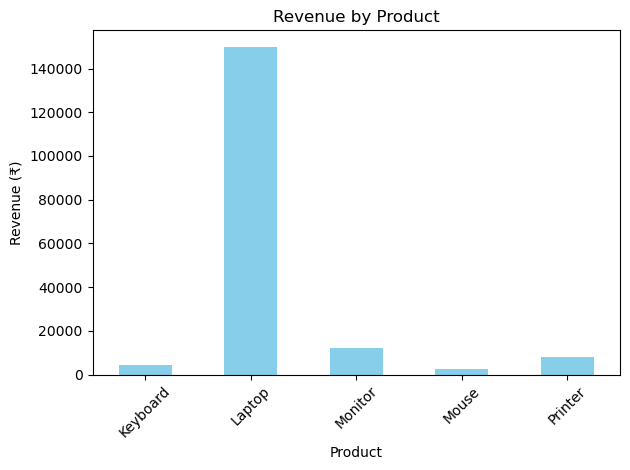

In [43]:
# plotting the bar graph
import matplotlib.pyplot as plt
conn = sqlite3.connect("sales_data.db")
query = """
SELECT 
    product_name, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product_name;
"""
df = pd.read_sql_query(query, conn)
conn.close()
df.plot(kind='bar', x='product_name', y='revenue', color='skyblue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png", dpi=300) #saving the graph in png format
plt.show()